In [ ]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial
import scipy
import nltk
import sklearn
from sklearn import metrics
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Data Module**

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Answers dataset (2).xlsx to Answers dataset (2) (2).xlsx


In [ ]:
df = pd.read_excel("Answers dataset (2).xlsx" )
df.head()

,Questions,Actual Answer,Student Response,Actual Grades
0,What is Artificial Intelligence?,Artificial Intelligence is a field of computer...,Artificial intelligence (AI) is wide-ranging b...,4
1,What is Tower of Hanoi?,Tower of Hanoi is a mathematical puzzle that s...,"Tower of Hanoi, also called Towers of Hanoi or...",2
2,What is a breadth-first search algorithm?,"A breadth-first search (BFS) algorithm, used f...",BFS is a traversing algorithm where you should...,4
3,What is a depth-first search algorithm?,Depth-first search (DFS) is based on LIFO (las...,Depth-first search is an algorithm for travers...,3
4,What is a bidirectional search algorithm?,"In a bidirectional search algorithm, the searc...",Bidirectional search is a graph search algorit...,3


In [ ]:
Actual_ans = df["Actual Answer"].values.tolist()
Student_Response = df["Student Response"].values.tolist()
Actual_Grades = df["Actual Grades"].values.tolist()

In [ ]:
Actual_Grades

[4, 2, 4, 3, 3, 5, 4, 2, 2, 2, 3, 5, 2, 2, 1, 4]

### **Processing Module**

In [ ]:
# Processing Data tokenisation of paragraph into sentence
from nltk.tokenize import sent_tokenize

Answer1 = []
Answer2 = []


for i in range(len(Actual_ans)):
  text = sent_tokenize(Actual_ans[i])
  Answer1.insert(i , text)

for i in range(len(Student_Response)):
  text = sent_tokenize(Student_Response[i])
  Answer2.insert(i , text)

### **Similarity** **Module**

In [ ]:
# Loading Pre Trained Model USE

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
# Function to calculate Cosine Similarity

def cosine_distance(s1, s2):
    cosine_distance = scipy.spatial.distance.cosine(s1, s2)
    cosine_similarity = 1 - cosine_distance
    return cosine_similarity

In [ ]:
# Function to calculate Euclidean Similarity

def Euclidean_distance(s1, s2):
    euclidean_dis = scipy.spatial.distance.euclidean(s1, s2)
    return euclidean_dis


In [ ]:
# Calculating Semantic Similarity using Cosine distance and euclidean distance

grades_similarity = []
grades_similarity_euclidean = []

for i in range(len(Actual_ans)):
  a1 = Actual_ans[i]
  a2 = Student_Response[i]
  messages = [a1 , a2]
  
  b1 = embed([a1])
  b2 = embed([a2])

  cs = cosine_distance(b1,b2)
  grades_similarity.insert(i , cs)


  es = Euclidean_distance(b1,b2)
  grades_similarity_euclidean.insert (i , es)


df.insert(4, "Cosine_Grade", grades_similarity, True) 
df.insert(5, "Euclidean_Grade", grades_similarity_euclidean, True)  

In [ ]:
df.head()

,Questions,Actual Answer,Student Response,Actual Grades,Cosine_Grade,Euclidean_Grade
0,What is Artificial Intelligence?,Artificial Intelligence is a field of computer...,Artificial intelligence (AI) is wide-ranging b...,4,0.702393,0.771501
1,What is Tower of Hanoi?,Tower of Hanoi is a mathematical puzzle that s...,"Tower of Hanoi, also called Towers of Hanoi or...",2,0.480253,1.019555
2,What is a breadth-first search algorithm?,"A breadth-first search (BFS) algorithm, used f...",BFS is a traversing algorithm where you should...,4,0.738059,0.723797
3,What is a depth-first search algorithm?,Depth-first search (DFS) is based on LIFO (las...,Depth-first search is an algorithm for travers...,3,0.702058,0.771936
4,What is a bidirectional search algorithm?,"In a bidirectional search algorithm, the searc...",Bidirectional search is a graph search algorit...,3,0.676824,0.803960


### **Grading** **Module**

In [ ]:
# Grading module based on Embeddings + Cosine Similarity

Grades = []
grades = df["Actual Grades"].values.tolist()

In [ ]:
# Grading module

for i in range(len(grades)):
  if grades_similarity[i] >= 0.8:
    Grades.insert(i , 5)
  elif (grades_similarity[i] >= 0.7) and (grades_similarity_euclidean[i] < 0.8):
     Grades.insert(i , 4)
  elif (grades_similarity[i] >= 0.6) and (grades_similarity_euclidean[i] < 0.7):
     Grades.insert(i , 3)
  elif (grades_similarity[i] >= 0.5) and (grades_similarity_euclidean[i] < 0.6):
     Grades.insert(i , 2)
  else:
    Grades.insert(i , 1)

In [ ]:
Grades
df.insert(6, "Cosine_score", Grades, True) 


In [ ]:
eg = df["Euclidean_Grade"].max()
Eu_list = []

for i in range(len(grades)):
  Eu = ((df["Euclidean_Grade"][i])/eg)
  Eu_list.insert(i,Eu)


In [ ]:
Eu_list

In [ ]:
Grades1 = []
grades = df["Actual Grades"].values.tolist()
grades

[4, 2, 4, 3, 3, 5, 4, 2, 2, 2, 3, 5, 2, 2, 1, 4]

In [ ]:

for i in range(len(grades)):
  if grades_similarity_euclidean[i] >= 0.8:
    Grades1.insert(i , 5)
  elif (grades_similarity_euclidean[i] >= 0.7) and (grades_similarity_euclidean[i] < 0.8):
     Grades1.insert(i , 4)
  elif (grades_similarity_euclidean[i] >= 0.6) and (grades_similarity_euclidean[i] < 0.7):
     Grades1.insert(i , 3)
  elif (grades_similarity_euclidean[i] >= 0.5) and (grades_similarity_euclidean[i] < 0.6):
     Grades1.insert(i , 2)
  else:
    Grades1.insert(i , 1)

In [ ]:
df.insert(7, "Euclidean_score", Grades1, True) 

In [ ]:
df.head()

,Questions,Actual Answer,Student Response,Actual Grades,Cosine_Grade,Euclidean_Grade,Cosine_score,Euclidean_score
0,What is Artificial Intelligence?,Artificial Intelligence is a field of computer...,Artificial intelligence (AI) is wide-ranging b...,4,0.702393,0.771501,4,4
1,What is Tower of Hanoi?,Tower of Hanoi is a mathematical puzzle that s...,"Tower of Hanoi, also called Towers of Hanoi or...",2,0.480253,1.019555,1,5
2,What is a breadth-first search algorithm?,"A breadth-first search (BFS) algorithm, used f...",BFS is a traversing algorithm where you should...,4,0.738059,0.723797,4,4
3,What is a depth-first search algorithm?,Depth-first search (DFS) is based on LIFO (las...,Depth-first search is an algorithm for travers...,3,0.702058,0.771936,4,4
4,What is a bidirectional search algorithm?,"In a bidirectional search algorithm, the searc...",Bidirectional search is a graph search algorit...,3,0.676824,0.803960,1,5


### **Evaluation and Metrics**

In [ ]:
Cosine_Grade = df["Cosine_score"]
Actual_Grades = df["Actual Grades"]
Euclidean_Grade = df["Euclidean_score"]

In [ ]:
y_pred_c = Grades
y_pred_e = Grades1
y_act = Actual_Grades


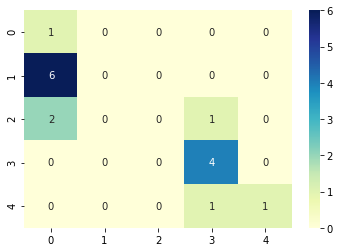

In [ ]:
# Cosine similarity Confusion Matrix

cf = metrics.confusion_matrix(y_act, y_pred_c, labels=[1,2,3,4,5])
sns.heatmap(cf, annot=True, cmap="YlGnBu")


In [ ]:
tn , fp , fn, tp = (cf).ravel

In [ ]:
print(metrics.classification_report(y_act, y_pred_c, labels=[1,2,3,4,5]))

              precision    recall  f1-score   support

           1       0.11      1.00      0.20         1
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3
           4       0.67      1.00      0.80         4
           5       1.00      0.50      0.67         2

    accuracy                           0.38        16
   macro avg       0.36      0.50      0.33        16
weighted avg       0.30      0.38      0.30        16



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


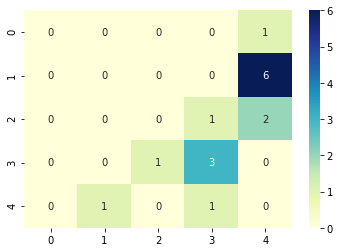

In [ ]:
# Euclidean Similarity Confusion Matrix

cf1 = metrics.confusion_matrix(y_act, y_pred_e, labels=[1,2,3,4,5])
sns.heatmap(cf1,annot=True, cmap="YlGnBu")



In [ ]:
print(metrics.classification_report(y_act, y_pred_e, labels=[1,2,3,4,5]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         3
           4       0.60      0.75      0.67         4
           5       0.00      0.00      0.00         2

    accuracy                           0.19        16
   macro avg       0.12      0.15      0.13        16
weighted avg       0.15      0.19      0.17        16



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
